In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sym
from scipy import integrate
from tqdm import tqdm
sym.init_printing(use_unicode=True)

In [2]:
def f(x):
    return x**2 + 10*np.sin(x)
    #return (x-1)**2

In [3]:
def Gradient(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [10]:
l = np.linspace(-10,10,40)
F = f(l)

In [11]:
#plt.plot(l,F)

In [24]:
def Minimizer(f,N=500,gamma=0.01):
    
    r = np.zeros(N)
    
    r[0] = np.random.uniform(-10,-8)
    #print(r)
    
    for i in tqdm(range(1,N)):
        
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1])
        
    return r

In [25]:
x = Minimizer(f)

100%|██████████████████████████████████████████████████████████| 499/499 [00:00<00:00, 76066.06it/s]


In [26]:
#x

<IPython.core.display.Javascript object>


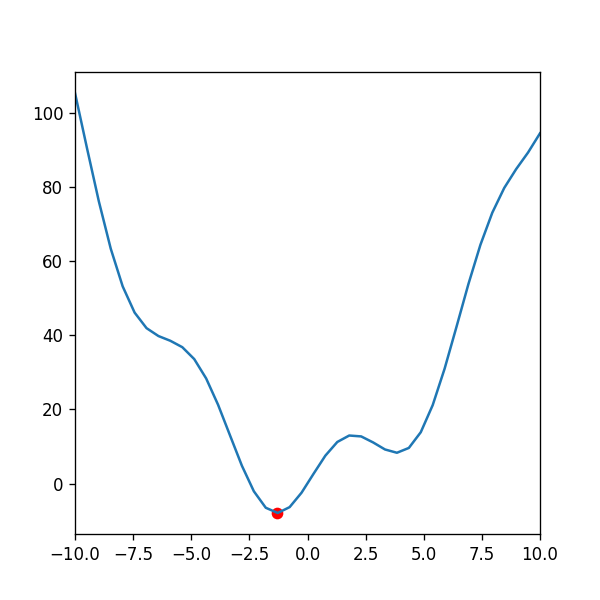

In [27]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

def init():
    
    ax.set_xlim(-10,10)
    #ax.set_ylim(0,3)
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.plot(l,F)
    plot = ax.scatter(x[i],f(x[i]),color='r')
    
    return plot

Animation = animation.FuncAnimation(fig, Update, frames = len(x), init_func=init)